<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks in TensorFlow

There are many definitions for a regressino problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Create data to view and fit

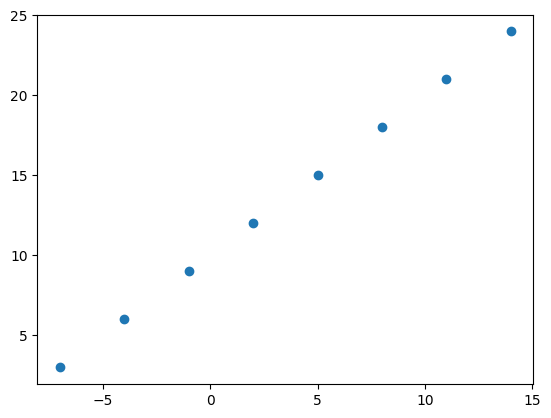

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroon", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroon', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

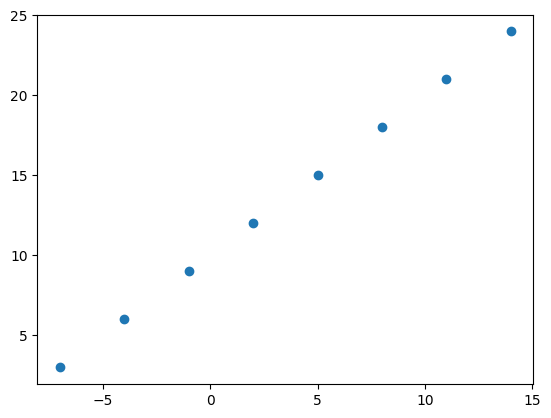

In [12]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hiden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patters between X & y (feature labels)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # losses mae stands for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stands for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 848ms/step - loss: 17.3736 - mae: 17.3736
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 17.0923 - mae: 17.0923
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 16.8111 - mae: 16.8111
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 16.5298 - mae: 16.5298
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 16.2486 - mae: 16.2486


In [14]:
# Check  out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 204ms/step


array([[-10.471494]], dtype=float32)

In [16]:
y_pred + 11

array([[0.5285063]], dtype=float32)

## Improve our model

We can improve our model by alterning our steps we took to craete our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # losses mae stands for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # SGD stands for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 821ms/step - loss: 10.2847 - mae: 10.2847
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 9.8347 - mae: 9.8347
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 9.3847 - mae: 9.3847
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 8.9347 - mae: 8.9347
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 8.4847 - mae: 8.4847
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 8.0347 - mae: 8.0347
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 7.5847 - mae: 7.5847
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 7.1347 - mae: 7.1347
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 6.9000 - mae: 6.9000
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 6.8262 - mae: 6.8262
Epoch 11/100
1/1 [==============================] - 0s 21ms/step -

In [18]:
# Remind ourselve of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 193ms/step


array([[27.325085]], dtype=float32)

In [20]:
# Let's see if we an make another improvement

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # losses mae stands for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD stands for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.8675 - mae: 12.8675
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1811 - mae: 12.1811
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4889 - mae: 11.4889
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.7898 - mae: 10.7898
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0821 - mae: 10.0821
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3638 - mae: 9.3638
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.6324 - mae: 8.6324
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8851 - mae: 7.8851
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.1191 - mae: 7.1191
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7400 - mae: 6.7400
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [21]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 196ms/step


array([[26.876648]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

`Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it... `

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

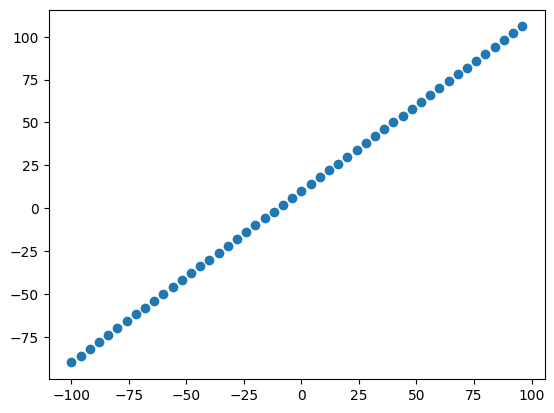

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training Set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation Set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test Set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available


In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training examples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 are test examples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

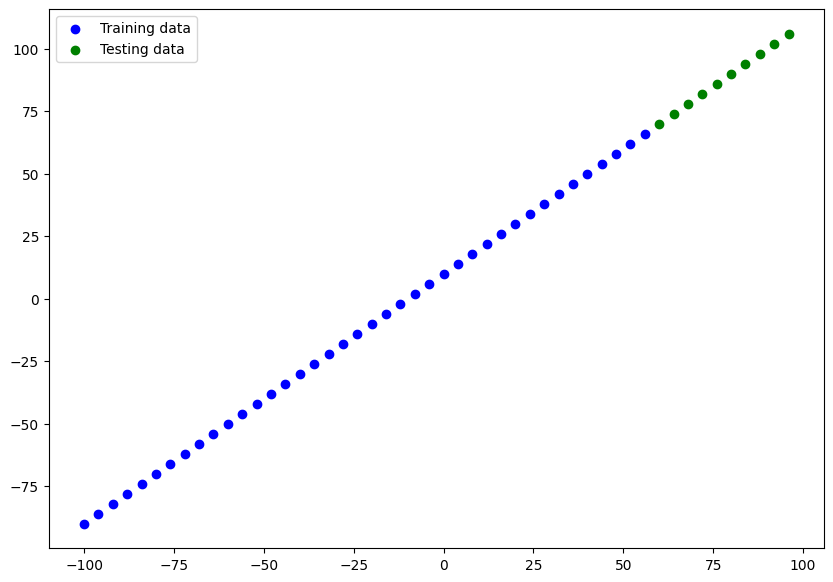

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label='Training data')
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend();

### Visualizing the model

In [29]:
X[0].shape

TensorShape([])

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameter (patterns) the model can update as it trains.
* Non-trainable paramas - these parameters aren't updates during training (this is typical when you bring in already tuned parameters during **transfer learning**)

📖 **Resource:** For a more indepth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](http://introtodeeplearning.com/).

🛠 **Exercise:** Try playing around with the number of hidden units in a dense layer, see how that affects the number of parameters (total and trainiable) in calling `model.summary()`

In [32]:
# Let's fit our model to the traininng data
model.fit(X_train, y_train, epochs=500, verbose=0)

In [33]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


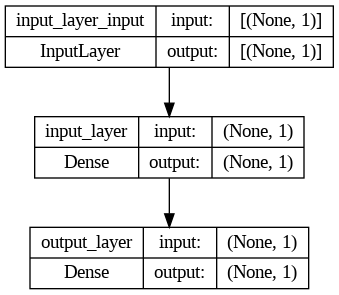

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model' predictions).

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 241ms/step


array([[ 69.88109 ],
       [ 73.8708  ],
       [ 77.860504],
       [ 81.850204],
       [ 85.83991 ],
       [ 89.82962 ],
       [ 93.81932 ],
       [ 97.80903 ],
       [101.79873 ],
       [105.78844 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **NOTE:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots trainng data to test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot testing data in red
  plt.scatter(test_data, predictions, c='r', label='Prediction data')
  # Show the legend
  plt.legend();

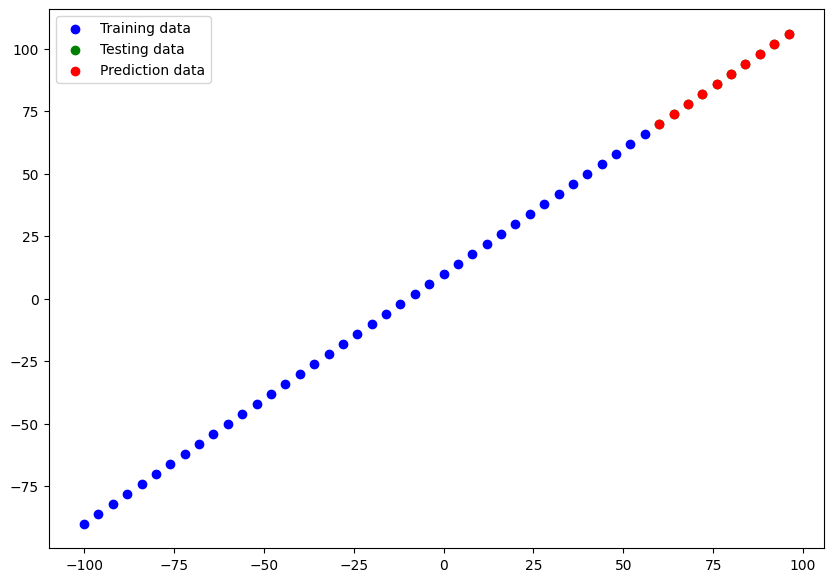

In [38]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression metrics

Depending on the probelm you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is my model's predictions?"
* MSE - mean squared error, "square the average errors"


In [39]:
# Evaluate the model on tyhe test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 750ms/step - loss: 0.1652 - mae: 0.1652


[0.16523590683937073, 0.16523590683937073]

In [40]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(tf.squeeze(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.1652359>

In [41]:
# Calculate the mean squared error
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.constant(tf.squeeze(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.028177273>

In [42]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between feature and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 71ms/step


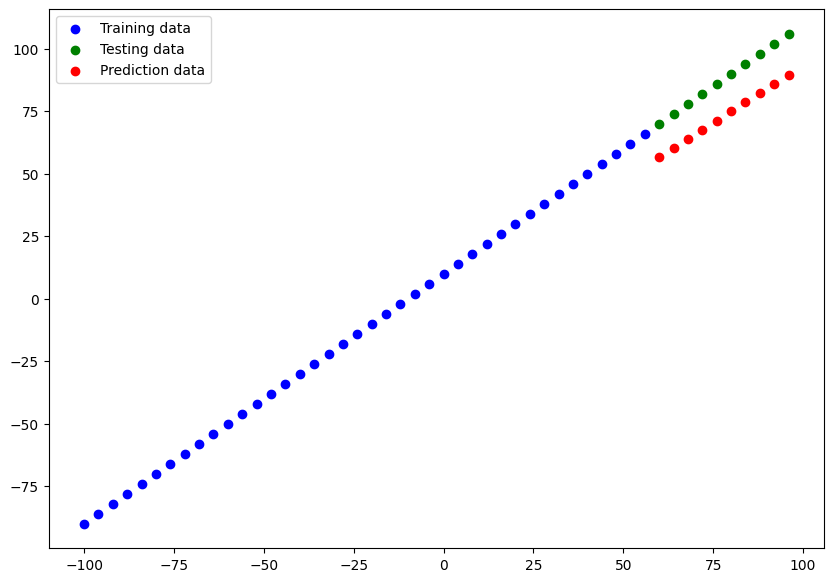

In [44]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [45]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.918262>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.39449>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [46]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 48ms/step


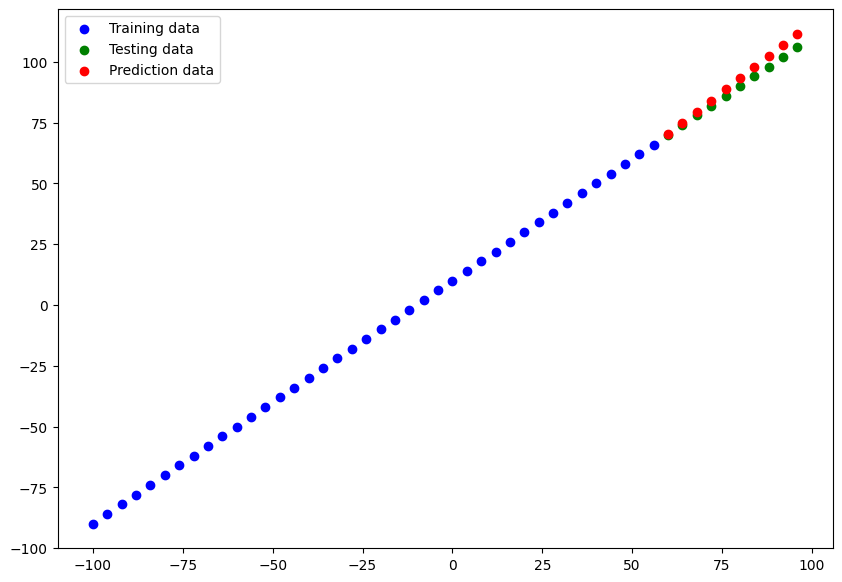

In [47]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [48]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9757469>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.60656>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [49]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 49ms/step


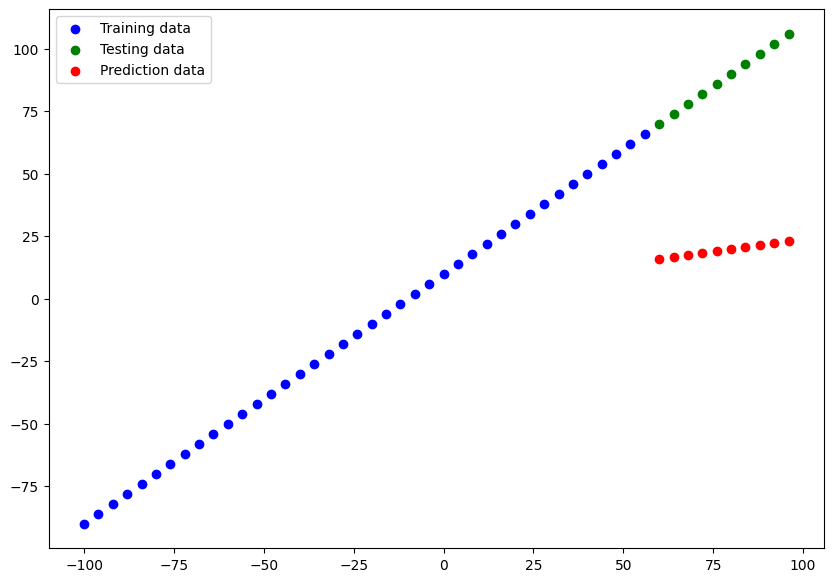

In [50]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.45056>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4771.1895>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then scale up.

## Comparing the results of our experiments

We've run a few experiments, lets compare the results.

In [52]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.918262,223.394485
1,model_2,2.975747,11.606560
2,model_3,68.450562,4771.189453


Looks like `model_2` performed the best.

In [53]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** One of your main goals should ne to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get close to figuring our what does work. Remember the machine learning practitioner's motto: 'experiment, experiment, experiment'.

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so it can be tedious if you're runing lots of experiments.

Luckily there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modeling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's to:

1. The SavedModel Format
2. The HDF5 format

In [54]:
# Save model using the SavedModel format
model_2.save("best_model_SaveModel_format")

In [55]:
# Save moedl using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [56]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [58]:
# Compare SavedModel format model mae to model_2 mae
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [59]:
# Load in model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Check to see if loaded .h5 model predictions are the same as model 2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file your're after and click "download".
2. Use code (see the cell below).
3. Save is to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [61]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [63]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


## A larger example

In [64]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [67]:
# Let's try to one hot encode our dataframe so that its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [68]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

In [69]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [70]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [72]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [73]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [74]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8692.2627 - mae: 8692.2627


[8692.2626953125, 8692.2626953125]

In [75]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our mode isn't performing too well... let's try to improve it.

To try and improve our model, we'll rtun 2 experiments:
1. Add an extra layer with more hiden units
2. Train for longer
3. (insert your own experiment here)

In [76]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13281.3193 - mae: 13281.3193
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13089.4619 - mae: 13089.4619
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12708.4199 - mae: 12708.4199
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11981.9434 - mae: 11981.9434
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10803.5078 - mae: 10803.5078
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9357.4346 - mae: 9357.4346
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8088.9355 - mae: 8088.9355
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7540.9292 - mae: 7540.9292
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7456.6401 - mae: 7456.6401
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7435.8672 - mae:

In [77]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4725.7651 - mae: 4725.7651


[4725.76513671875, 4725.76513671875]

In [78]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13269.1475 - mae: 13269.1475
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13073.9531 - mae: 13073.9531
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12664.4131 - mae: 12664.4131
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11884.5576 - mae: 11884.5576
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 10652.3779 - mae: 10652.3779
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9199.6855 - mae: 9199.6855
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7989.7495 - mae: 7989.7495
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7512.5356 - mae: 7512.5356
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7444.5171 - mae: 7444.5171
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7424.8877 - mae:

In [79]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.1968 - mae: 3169.1968


[3169.19677734375, 3169.19677734375]

Text(0.5, 0, 'epochs')

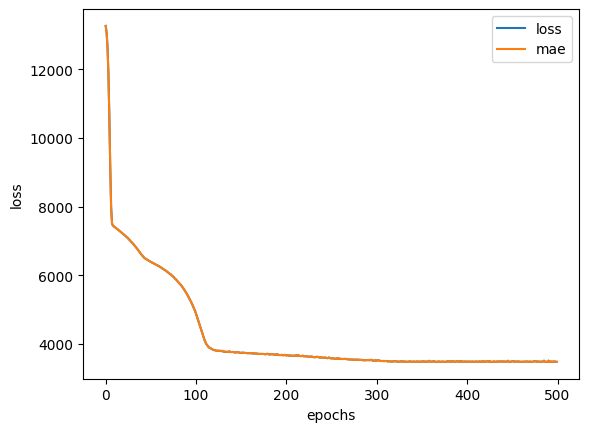

In [80]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long sould you train for?

It depends. Really... it depends on the problem you're working on. However, many peole have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model once its stops imrpoving a certain metric.

## Preprocessing data (normilization and standardization)

In terms of scaling values, neural networks prefer normalization.

If you are not sure, you can try both and see what works better.

In [81]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from scikitlearn.

In [82]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to out training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [83]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [84]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [85]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful: our data has been normalized and one hot encoded. Now let's build a neural network model on our normalized data.

In [86]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13343.6260 - mae: 13343.6260
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13334.2422 - mae: 13334.2422
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13310.5723 - mae: 13310.5723
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13261.0488 - mae: 13261.0488
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13174.2803 - mae: 13174.2803
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13039.6191 - mae: 13039.6191
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 12847.1660 - mae: 12847.1660
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 12587.0908 - mae: 12587.0908
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 12249.3906 - mae: 12249.3906
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 11832.62

In [87]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3160.9368 - mae: 3160.9368


[3160.936767578125, 3160.936767578125]

## Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

### Create Dataset

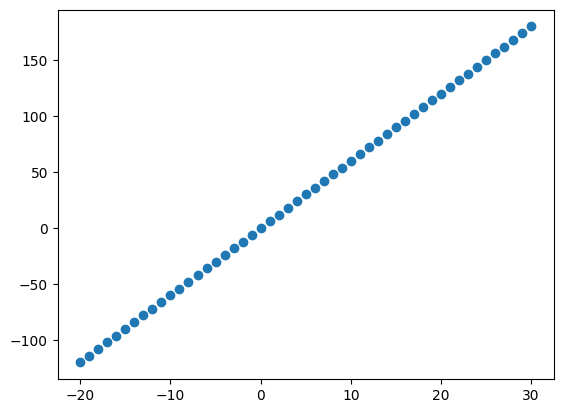

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.linspace(-20, 30, num=51)

# Create Labels
y = X * 6

# Visualize it
plt.scatter(X, y);

### Split into Train and Test Data

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(51, 40, 11)

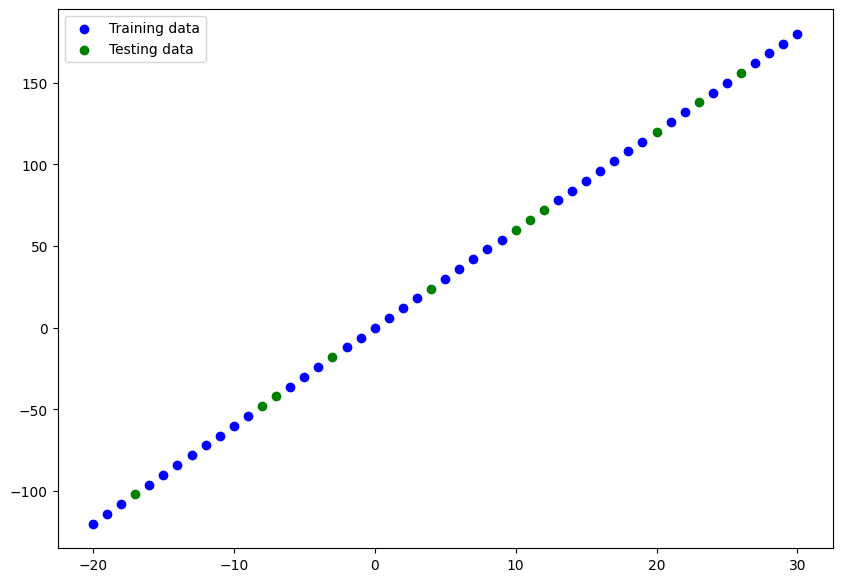

In [177]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label='Training data')
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend();

### Create Model

In [180]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # losses mae stands for mean absolute error
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), # SGD stands for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

Text(0.5, 0, 'epochs')

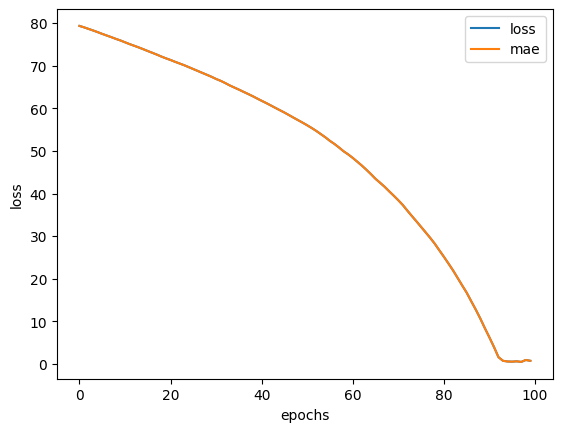

In [181]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Visualize model performance and predictions

In [182]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 159ms/step


array([[ 139.91011 ],
       [ 121.668724],
       [ 158.15147 ],
       [ -48.583984],
       [  24.381472],
       [  66.94465 ],
       [ -18.181711],
       [  73.0251  ],
       [-103.30807 ],
       [  60.864193],
       [ -42.503536]], dtype=float32)

In [183]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots trainng data to test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot testing data in red
  plt.scatter(test_data, predictions, c='r', label='Prediction data')
  # Show the legend
  plt.legend();

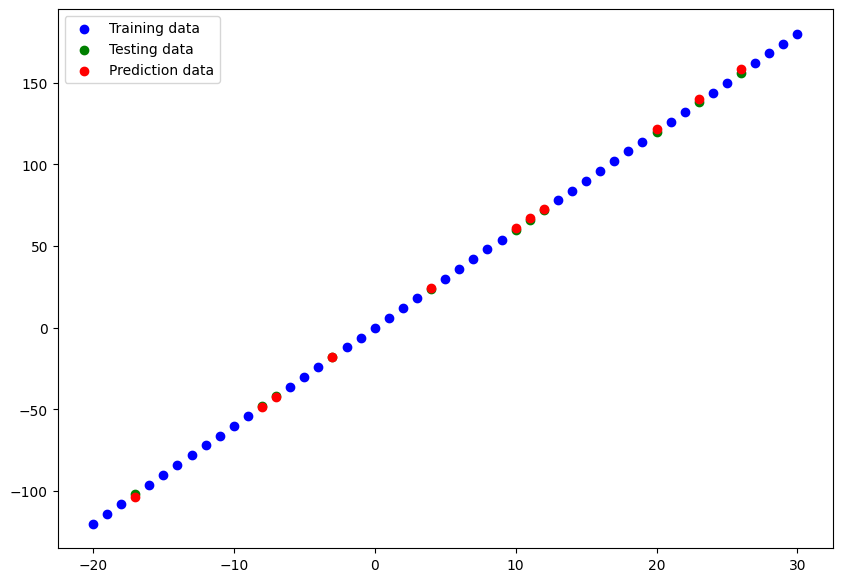

In [184]:
plot_predictions()

### Expirements with the insurance dataset

In [185]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [187]:
# Let's try to one hot encode our dataframe so that its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [188]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

In [189]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [193]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 9700.1797 - mae: 9700.1797
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7306.0811 - mae: 7306.0811
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 6799.6509 - mae: 6799.6509
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 6411.2178 - mae: 6411.2178
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6108.0234 - mae: 6108.0234
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 5612.8335 - mae: 5612.8335
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 4598.1528 - mae: 4598.1528
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 4102.8730 - mae: 4102.8730
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3890.7964 - mae: 3890.7964
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3817.8162 - mae: 3817.8162

In [194]:
# Check the results of the insurance model on the test data
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3271.2639 - mae: 3271.2639


[3271.263916015625, 3271.263916015625]

Text(0.5, 0, 'epochs')

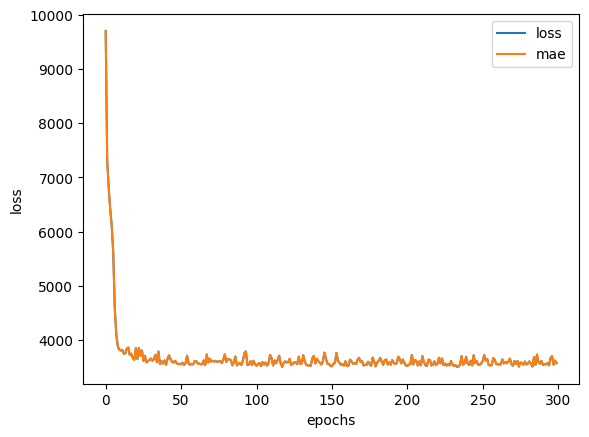

In [195]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Boston Prices Dataset fitting

In [203]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [207]:
x_train.size, x_test.size

(5252, 1326)

In [213]:
# Set random seed
tf.random.set_seed(42)

# Create model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     metrics=["mae"])

# Fit the model
history = boston_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 148.3440 - mae: 148.3440
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 50.2740 - mae: 50.2740
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 19.7080 - mae: 19.7080
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 12.4733 - mae: 12.4733
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 10.8368 - mae: 10.8368
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 10.4279 - mae: 10.4279
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 9.9762 - mae: 9.9762
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 9.5788 - mae: 9.5788
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 9.1858 - mae: 9.1858
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 8.9602 - mae: 8.9602
Epoch 11/100
13/13 [=========================

Text(0.5, 0, 'epochs')

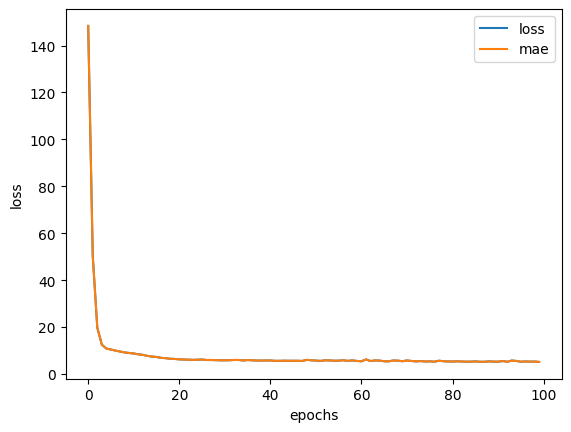

In [214]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")